# Setup

In [20]:
import sys
sys.path.insert(0, '..')

In [21]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from processing_utils.feature_data_from_mat import load_subject_high_gamma_phoneme, get_high_gamma_data_spatialAvg

In [22]:
import os

data_dir = '../data/'

In [23]:
phon_labels = ['a', 'ae', 'i', 'u', 'b', 'p', 'v', 'g', 'k']
artic_labels = ['low', 'high', 'labial', 'dorsal']
phon_to_artic_dict = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4}

In [24]:
def phon_to_artic(phon_idx, phon_to_artic_conv):
    return phon_to_artic_conv[phon_idx]

def phon_to_artic_seq(phon_seq, phon_to_artic_conv):
    flat_seq = phon_seq.flatten()
    artic_conv = np.array([phon_to_artic(phon_idx, phon_to_artic_conv) for phon_idx in flat_seq])
    return np.reshape(artic_conv, phon_seq.shape)

# Load in phoneme onset data across patients and save to pkl file

In [25]:
import alignment.alignment_utils as utils

In [50]:
pts = ['S14', 'S26', 'S23', 'S33', 'S22', 'S39', 'S58', 'S62']
contactSizes = ['8x8', '7x7', '6x6', '5x5', '4x4', '3x3', '2x2', '1x1']
phonIdxs = [1,2,3]

pt_savg_data = {}
for pt in pts:
    savg_data = {}
    for p in phonIdxs:
        savg_fname = f'{pt}/{pt}_spatialAvg_HG_p{p}.mat'
        savg_data_curr_phon, all_phons = get_high_gamma_data_spatialAvg(os.path.join(data_dir, savg_fname), contactSizes)
        savg_data[f'X{p}'] = savg_data_curr_phon
        savg_data[f'y{p}'] = all_phons[:,p-1]
    
    savg_collapsed = {}
    for cs in contactSizes:
        savg_collapsed[cs] = np.concatenate((savg_data['X1'][cs], savg_data['X2'][cs], savg_data['X3'][cs]), axis=0)
    phon_labels_collapsed = np.concatenate((savg_data['y1'], savg_data['y2'], savg_data['y3']), axis=0)
    artic_labels_collapsed = phon_to_artic_seq(phon_labels_collapsed, phon_to_artic_dict)

    savg_data['y_full_phon'] = all_phons
    savg_data['X_collapsed'] = savg_collapsed
    savg_data['y_phon_collapsed'] = phon_labels_collapsed
    savg_data['y_artic_collapsed'] = artic_labels_collapsed
    pre_pts = [p for p in pts if p != pt]

    pt_savg_data[pt] = savg_data | {'pre_pts': pre_pts}

In [51]:
utils.save_pkl(pt_savg_data, '../data/pt_savg_data_S62.pkl')

# Check data in pkl file

In [52]:
savg_data.keys()

dict_keys(['X1', 'y1', 'X2', 'y2', 'X3', 'y3', 'y_full_phon', 'X_collapsed', 'y_phon_collapsed', 'y_artic_collapsed'])

In [60]:
pt_savg_data_old = utils.load_pkl('../data/pt_savg_data_S62_old.pkl')

S58: 
Contact Size: 8x8
(153, 200, 2) (153,) (153, 3)


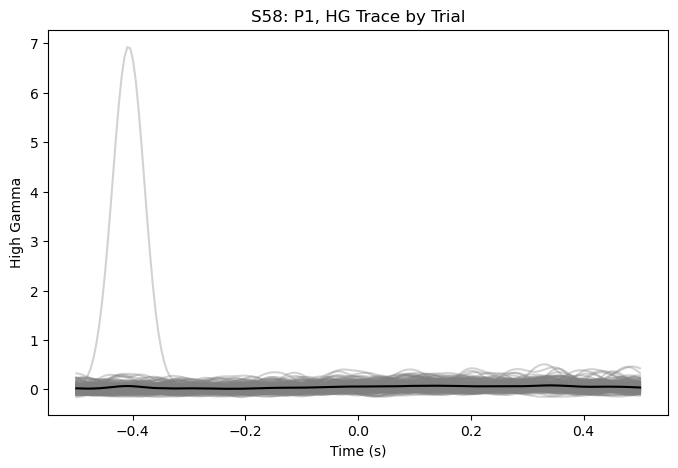

Contact Size: 7x7
(153, 200, 3) (153,) (153, 3)


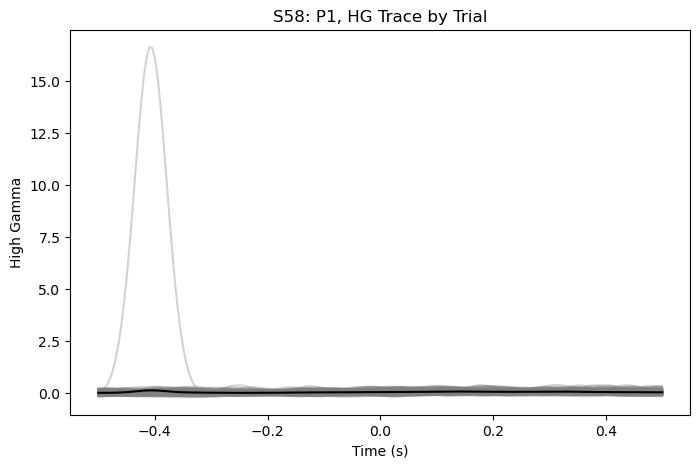

Contact Size: 6x6
(153, 200, 4) (153,) (153, 3)


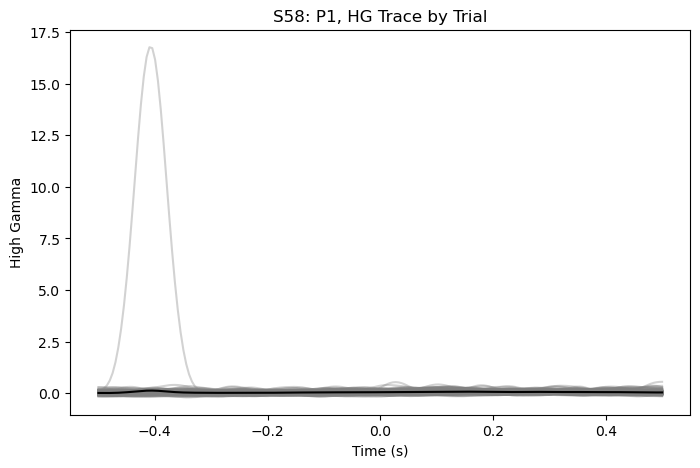

Contact Size: 5x5
(153, 200, 8) (153,) (153, 3)


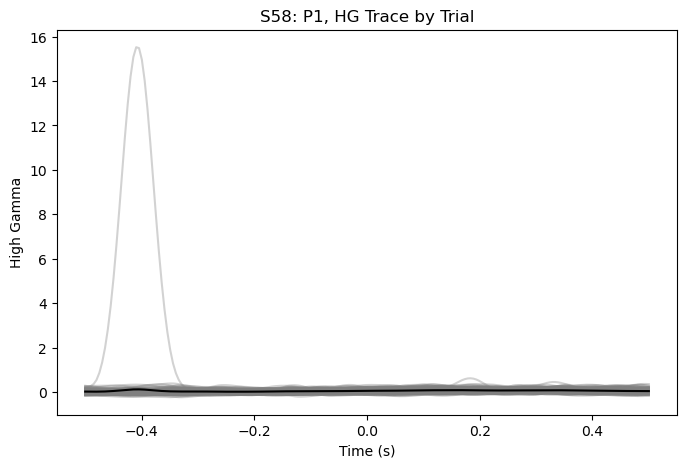

Contact Size: 4x4
(153, 200, 13) (153,) (153, 3)


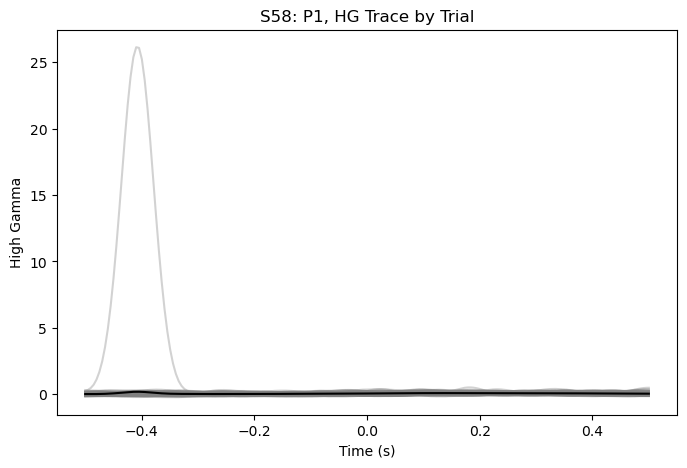

Contact Size: 3x3
(153, 200, 24) (153,) (153, 3)


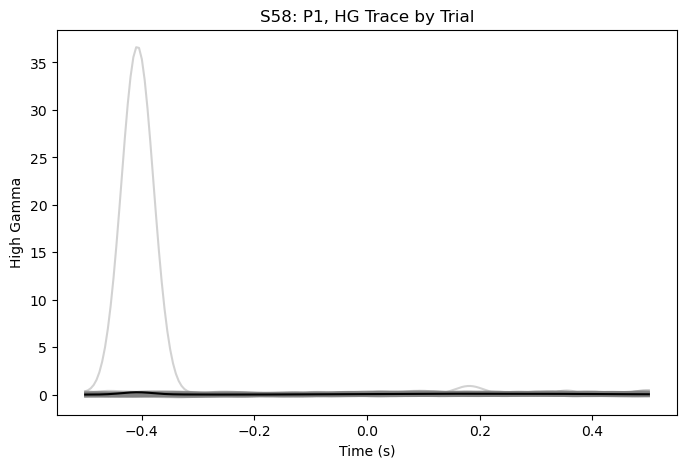

Contact Size: 2x2
(153, 200, 51) (153,) (153, 3)


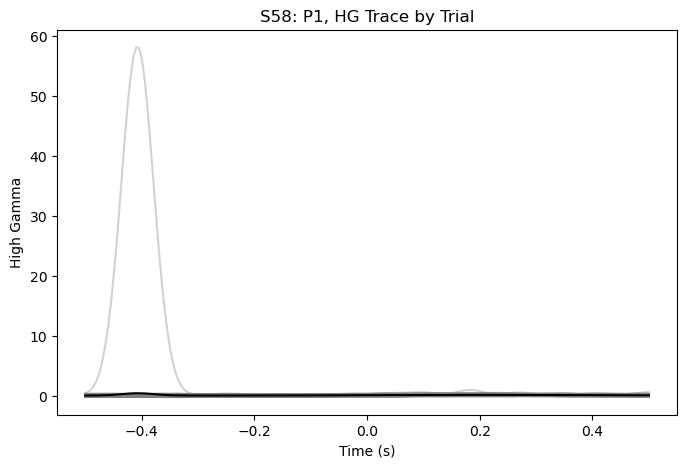

Contact Size: 1x1
(153, 200, 184) (153,) (153, 3)


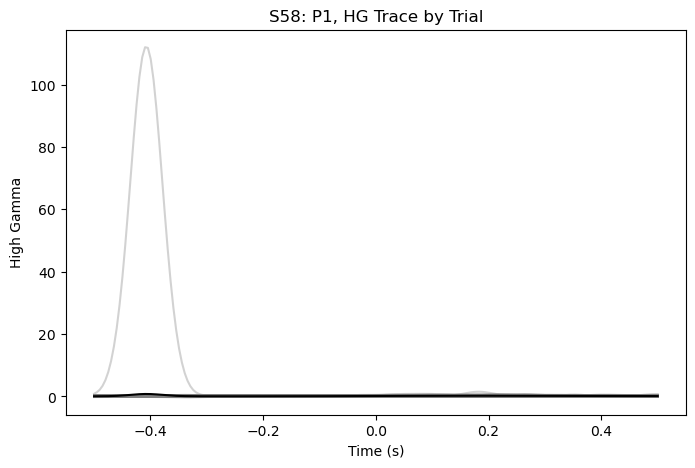

In [73]:
p_ind = 1
t = np.linspace(-0.5, 0.5, 200)

# for pt in pts:
for pt in ['S58']:
    print(f'{pt}: ')
    pt_data, pre_data = utils.decoding_data_from_dict(pt_savg_data_old, pt, p_ind, lab_type='phon', algn_type='phon_seq')
    for cs in contactSizes:
        print(f'Contact Size: {cs}')
        x, y, y_full = pt_data
        print(x[cs].shape, y.shape, y_full.shape)

        hg_data = pt_data[0][cs]
        plt.figure(figsize=(8,5))

        # plt.plot(t, np.mean(hg_data, axis=0), 'grey', alpha=0.35) # average over trials
        plt.plot(t, np.mean(hg_data, axis=2).T, 'grey', alpha=0.35) # average over channels
        plt.plot(t, np.mean(np.mean(hg_data, axis=2), axis=0), 'black')

        # plt.title(f'{pt}: P{p_ind}, HG Trace by Channel')
        plt.title(f'{pt}: P{p_ind}, HG Trace by Trial')
        plt.xlabel('Time (s)')
        plt.ylabel('High Gamma')
        plt.show()

S26: 
Contact Size: 8x8
(152, 200, 2) (152,) (152, 3)


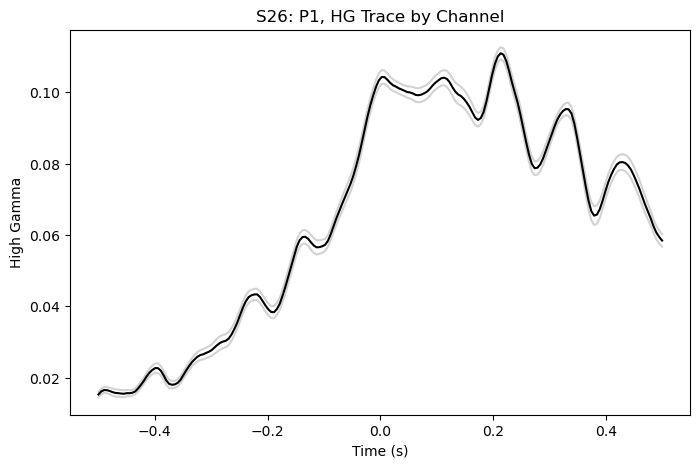

Contact Size: 7x7
(152, 200, 2) (152,) (152, 3)


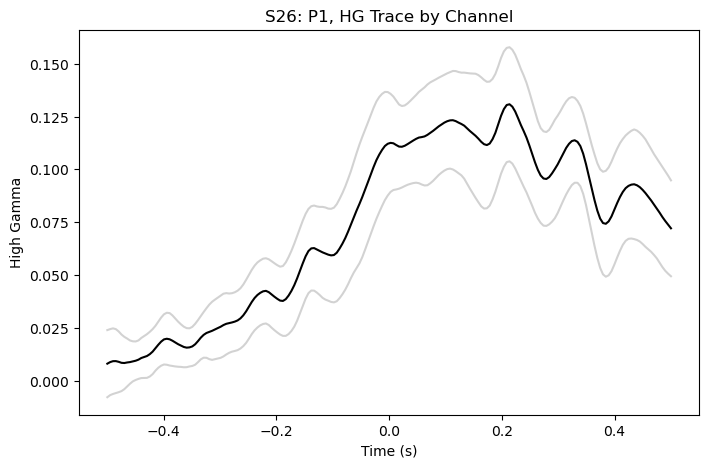

Contact Size: 6x6
(152, 200, 2) (152,) (152, 3)


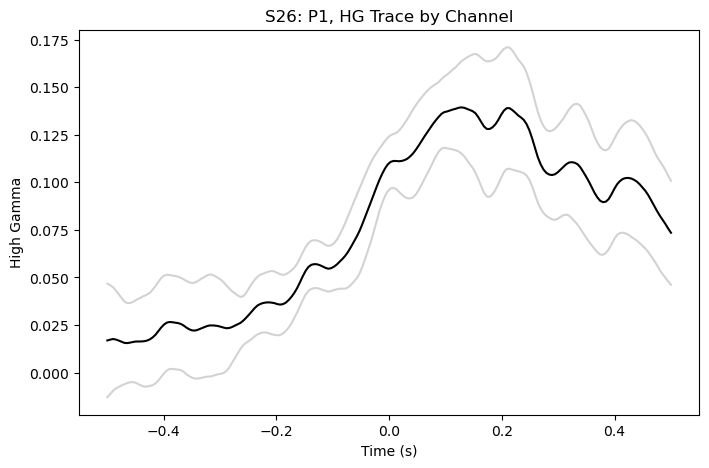

Contact Size: 5x5
(152, 200, 3) (152,) (152, 3)


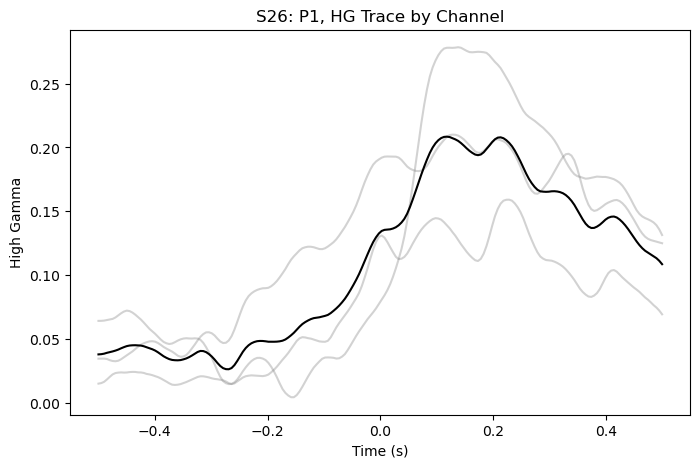

Contact Size: 4x4
(152, 200, 8) (152,) (152, 3)


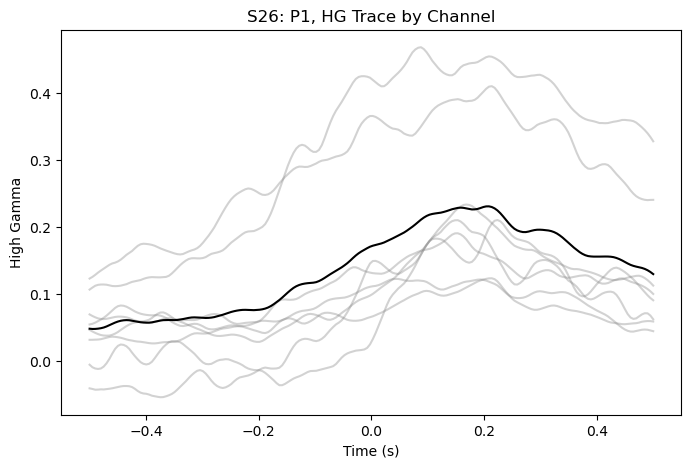

Contact Size: 3x3
(152, 200, 10) (152,) (152, 3)


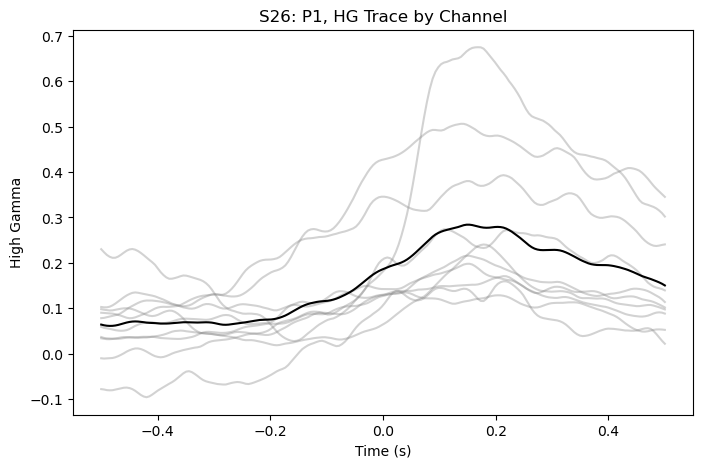

Contact Size: 2x2
(152, 200, 28) (152,) (152, 3)


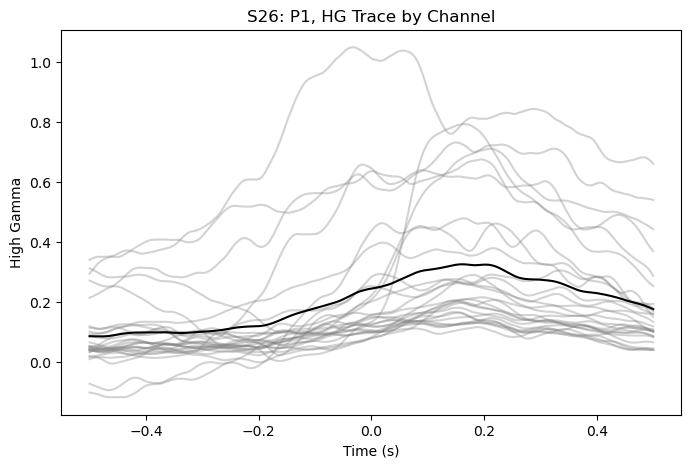

Contact Size: 1x1
(152, 200, 110) (152,) (152, 3)


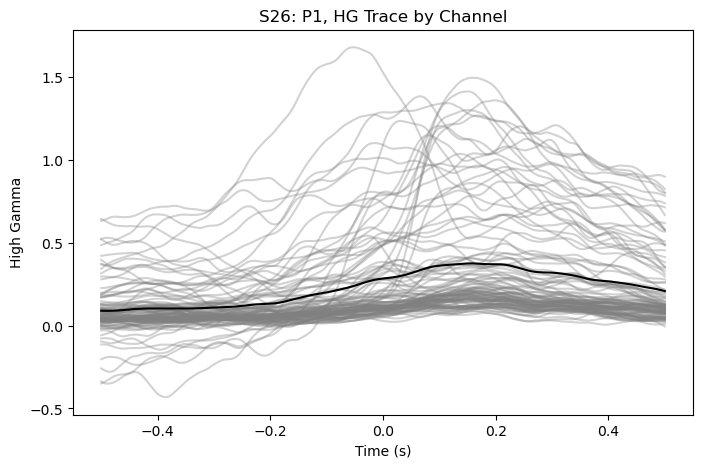

In [59]:
p_ind = 1
t = np.linspace(-0.5, 0.5, 200)

# for pt in pts:
for pt in ['S26']:
    print(f'{pt}: ')
    pt_data, pre_data = utils.decoding_data_from_dict(pt_savg_data, pt, p_ind, lab_type='phon', algn_type='phon_seq')
    for cs in contactSizes:
        print(f'Contact Size: {cs}')
        x, y, y_full = pt_data
        print(x[cs].shape, y.shape, y_full.shape)

        hg_data = pt_data[0][cs]
        plt.figure(figsize=(8,5))

        plt.plot(t, np.mean(hg_data, axis=0), 'grey', alpha=0.35) # average over trials
        # plt.plot(t, np.mean(hg_data, axis=2).T, 'grey', alpha=0.35) # average over channels
        plt.plot(t, np.mean(np.mean(hg_data, axis=2), axis=0), 'black')

        plt.title(f'{pt}: P{p_ind}, HG Trace by Channel')
        # plt.title(f'{pt}: P{p_ind}, HG Trace by Trial')
        plt.xlabel('Time (s)')
        plt.ylabel('High Gamma')
        plt.show()
    